# The analytic bang-bang solution

  
## Reach of the target

Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$

where $\beta$ and $m$ are constants of the eye, with $\left[\dfrac{\beta}{m}\right] = s^{-1}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
b = 100
m = 1
xT = 10
dt = 0.001
t_T = .05
t_R = .05
T = int(t_T/dt)
R = int(t_R/dt)
time = np.linspace(0, 0.1, R+T+1)
time_ms = time/dt

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_+}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_+}{\beta}\left (1-e^{- \frac{\beta}{m}t} \right )$ and so : $x(t) = \frac{U_+}{\beta}\left [t-\frac{m}{\beta}\left(1-e^{- \frac{\beta}{m}t} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_-}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_-}{\beta}\left (1-e^{\frac{\beta}{m}\left (T-t\right)} \right )$ and so : $x(t) = x_T - \frac{U_-}{\beta}\left [T-t+\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )\right]$
 

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_{\infty}}{m}$  
  
We find:  $U_{\infty} = 0$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = 0$ (and $\ddot{x}(t) = 0$) and so : $x(t) = x_T$
 

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = \frac{U_{MAX}}{\beta}\left(1-e^{- \frac{\beta}{m}\rho T} \right ) = -\frac{U_{MAX}}{\beta}\left(1-e^{\frac{\beta}{m}\left(1-\rho\right)T} \right )$.  
  
Finally: $\rho = -\dfrac{m}{\beta T}\ln \left(\dfrac{2}{1+e^{\frac{\beta T}{m}}}\right)$

In [3]:
rho = -m/(b*T*dt)*np.log(2/(1+np.exp(b*T*dt/m)))
rhoT = int(np.round(T*rho))

The continuity of the position at time $\rho\cdot T $ enables to find $U_{MAX}: U_{MAX} = \dfrac{\beta}{\left (2\rho-1\right)T-\frac{m}{\beta}\left(2-e^{-\frac{\beta}{m}\rho T} - e^{\frac{\beta}{m}\left(1-\rho \right)T}\right)} \cdot  x_T$

Note: since the relation is linear, trajectories are linear in 2D for any target's position.

In [4]:
Umax = b*xT/((2*rho-1)*T*dt-m/b*(2-np.exp(-rho*b*T*dt/m)-np.exp((1-rho)*b*T*dt/m)))

In [5]:
x = np.concatenate((Umax/b*(time[0:(rhoT+1)]-m/b*(1-np.exp(-b/m*time[0:(rhoT+1)]))),xT+Umax/b*(T*dt-time[(rhoT+1):(T+1)]+m/b*(1-np.exp(b/m*(T*dt-time[(rhoT+1):(T+1)])))),xT*np.ones(R)))
v = np.concatenate((Umax/b*(1-np.exp(-b/m*time[0:(rhoT+1)])),-Umax/b*(1-np.exp(b/m*(T*dt-time[(rhoT+1):(T+1)]))),np.zeros(R)))
u = np.concatenate((Umax*np.ones(rhoT+1),-Umax*np.ones(T-rhoT),np.zeros(R)))

In [6]:
u

array([ 27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
        27569.95898152,  27569.95898152,  27569.95898152,  27569.95898152,
       -27569.95898152, -27569.95898152, -27569.95898152, -27569.95898152,
       -27569.95898152, -27569.95898152, -27569.95898152,      0.        ,
            0.        ,  

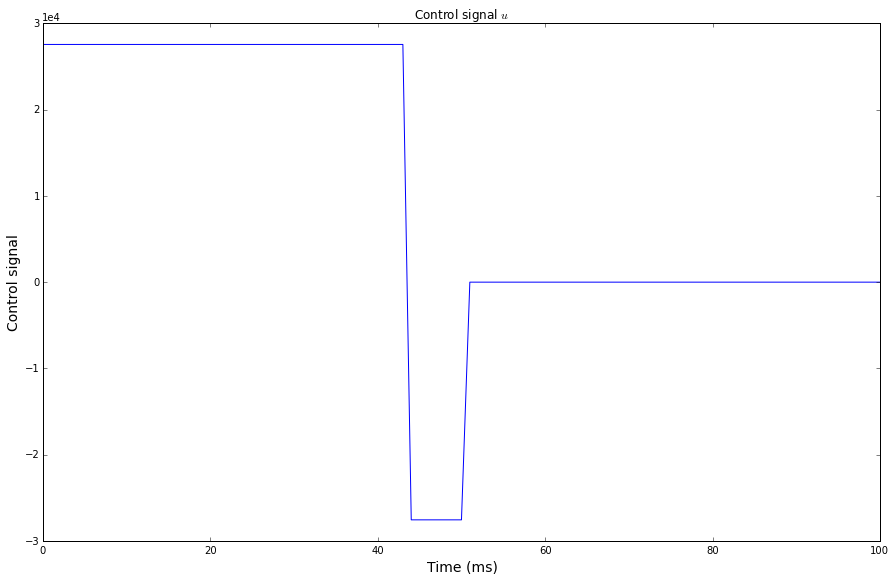

In [7]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u, '-')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
#ax.set_xlim(0, 150)


(0, 11)

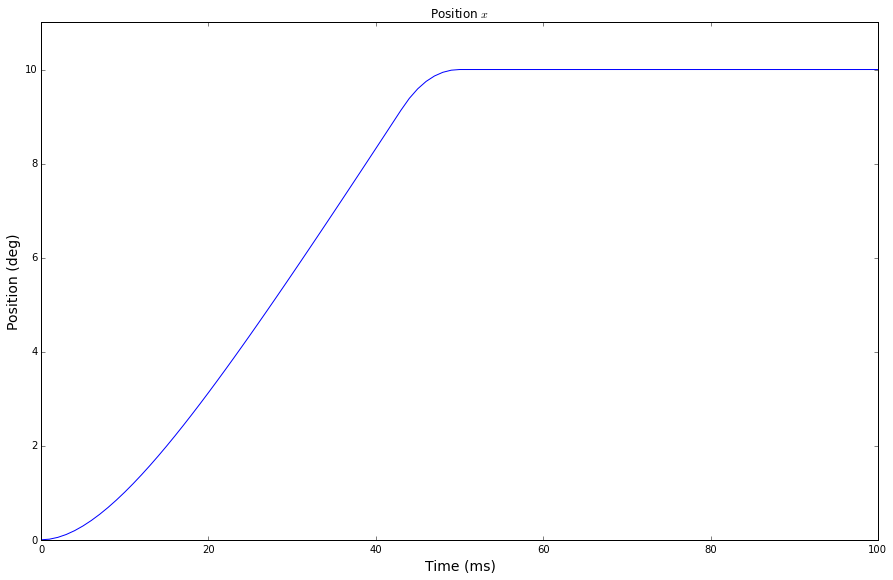

In [9]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x, '-')
ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(0, 11)


(-10, 300)

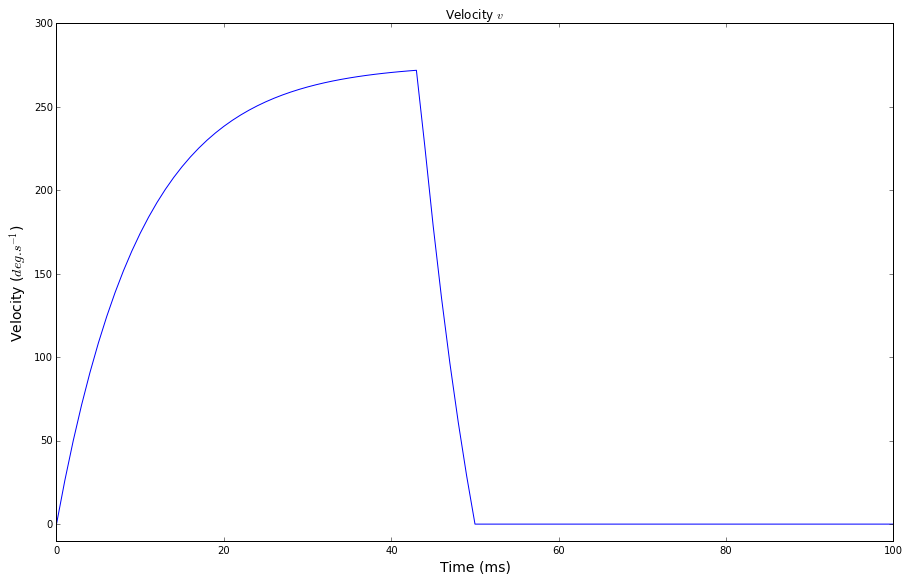

In [14]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v, '-')
ax.set_title(r'Velocity $v$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-10, 300)


## Reach and pursuit of the target

Here, the target is moving with the velocity $v$. We want to reach the moving target (which position at time $t$ is $x_T+v t$ and then follow it. 

Again, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_+}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_+}{\beta}\left (1-e^{- \frac{\beta}{m}t} \right )$ and so : $x(t) = \frac{U_+}{\beta}\left [t-\frac{m}{\beta}\left(1-e^{- \frac{\beta}{m}t} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_-}{m}$  
  
We find:  $\dot{x}(t) = \frac{U_-}{\beta}\left (1-e^{\frac{\beta}{m}\left (T-t\right)} \right ) + v\cdot e^{\frac{\beta}{m}\left (T-t\right)}$ and so : $x(t) = x_T +v\cdot T- \frac{U_-}{\beta}\left [T-t+\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )\right] + v\cdot \frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (T-t\right)} \right )$

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{\beta}{m}\cdot\dot{x}(t)+\dfrac{U_{\infty}}{m}$  
  
We find:  $U_{\infty} = \beta\cdot v$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = v$ (and $\ddot{x}(t) = 0$) and so : $x(t) = v\cdot \left ( t - T \right)+x_T+v\cdot T$

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
  
We assume that $U_+ = U_{MAX}$ and $U_- = - U_{MAX}$.  
  
We deduce : $\dot{x}(\rho T) = \frac{U_{MAX}}{\beta}\left(1-e^{- \frac{\beta}{m}\rho T} \right ) = -\frac{U_{MAX}}{\beta}\left(1-e^{\frac{\beta}{m}\left(1-\rho\right)T} \right )+v\cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}$.  
  
Finally: $U_{MAX} = -\dfrac{\beta \cdot v \cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}}{2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}}$


The continuity of the position at time $\rho \cdot T$ enables to find the value of $\rho$.
Indeed, $\rho$ is the unique solution in $\intervalle{0}{1}$ of :
$$
\left(x_T+vT \right)\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right) +v\cdot\frac{m}{\beta}\left(1-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right)\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T}\right)-v\cdot e^{\frac{\beta}{m}\left (1-\rho\right)T}\left [\left(2\rho-1\right)T-\frac{m}{\beta}\left(2-e^{-\frac{\beta}{m}\rho T}-e^{\frac{\beta}{m}\left (1-\rho\right)T} \right )\right] = 0
$$

Numerically, we find $\rho$, and then we deduce $U_{MAX}$, which enables to compute the position and the velocity of the bangbang.

In [15]:
tau = m/b

ValueError: x and y must have same first dimension

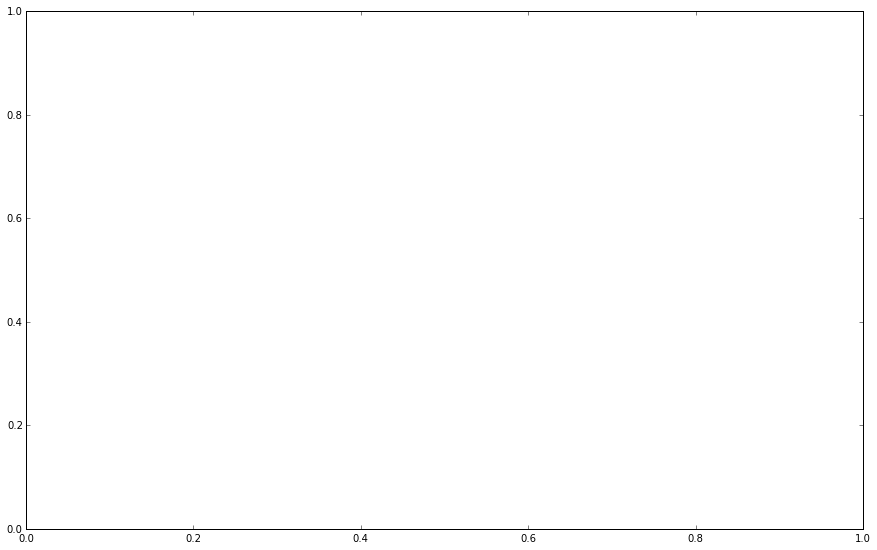

In [16]:
vrho = np.linspace(0.5,1,1001)
y = (xT+20*t_T+20*tau*(1-np.exp((1-vrho)*t_T/tau)))*(2-np.exp(-vrho*t_T/tau)-np.exp((1-vrho)*t_T/tau))+20*np.exp((1-vrho)*t_T/tau)*((1-vrho)*t_T+tau*(1-np.exp((1-vrho)*t_T/tau)))-20*np.exp((1-vrho)*t_T/tau)*(vrho*t_T-tau*(1-np.exp(-vrho*t_T/tau)))

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(rho,y)
ax.plot([0.5,1],[0,0])
ax.set_title(r'Unique zero-value $\rho$')
ax.set_xlabel(r'$\rho$', fontsize=14)
ax.set_ylabel('y', fontsize=14)

In [17]:
Umax_pursuit = 29817.88442822358
rho_pursuit = 0.875613511
rhoT_pursuit = int(np.round(T*rho_pursuit))

In [18]:
x_pursuit = np.concatenate((Umax_pursuit/b*(time[0:(rhoT_pursuit+1)]-m/b*(1-np.exp(-b/m*time[0:(rhoT_pursuit+1)]))),xT+20*T*dt+Umax_pursuit/b*(T*dt-time[(rhoT_pursuit+1):(T+1)]+m/b*(1-np.exp(b/m*(T*dt-time[(rhoT_pursuit+1):(T+1)]))))+m/b*20*(1-np.exp(b/m*(T*dt-time[(rhoT_pursuit+1):(T+1)]))),xT+20*T*dt+20*(time[(T+1):(T+R+1)]-t_T)))
v_pursuit = np.concatenate((Umax_pursuit/b*(1-np.exp(-b/m*time[0:(rhoT_pursuit+1)])),-Umax_pursuit/b*(1-np.exp(b/m*(T*dt-time[(rhoT_pursuit+1):(T+1)])))+20*np.exp(b/m*(T*dt-time[(rhoT_pursuit+1):(T+1)])),20*np.ones(R)))
u_pursuit = np.concatenate((Umax_pursuit*np.ones(rhoT_pursuit+1),-Umax_pursuit*np.ones(T-rhoT_pursuit),100*20*np.ones(R)))

(-31000, 31000)

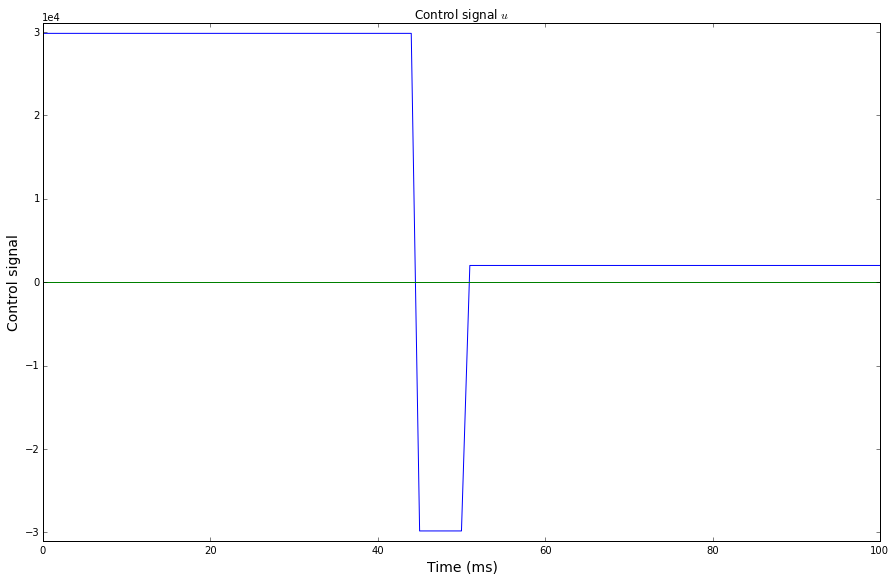

In [21]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u_pursuit, '-')
ax.plot(time_ms,np.zeros(T+R+1))
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
ax.set_ylim(-31000, 31000)


(-1, 13)

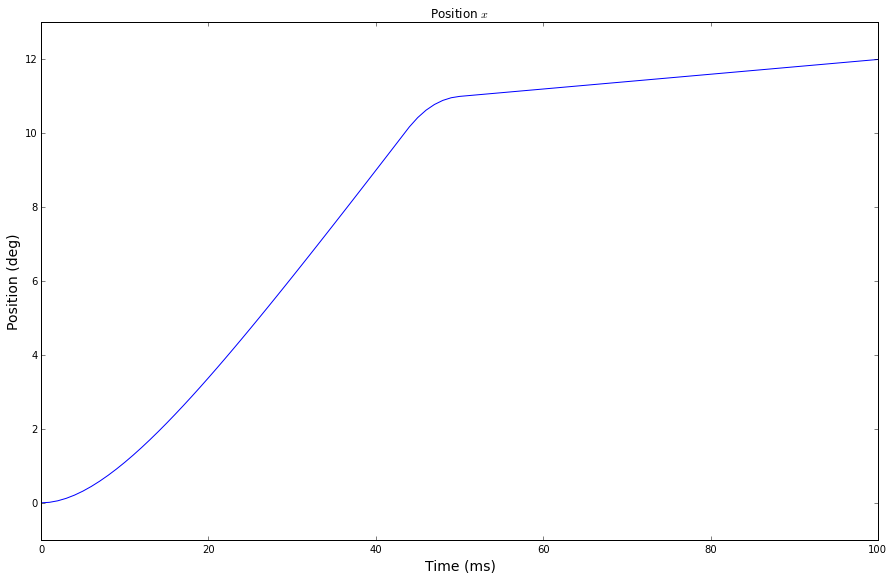

In [24]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x_pursuit, '-')
ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-1, 13)


(-10, 310)

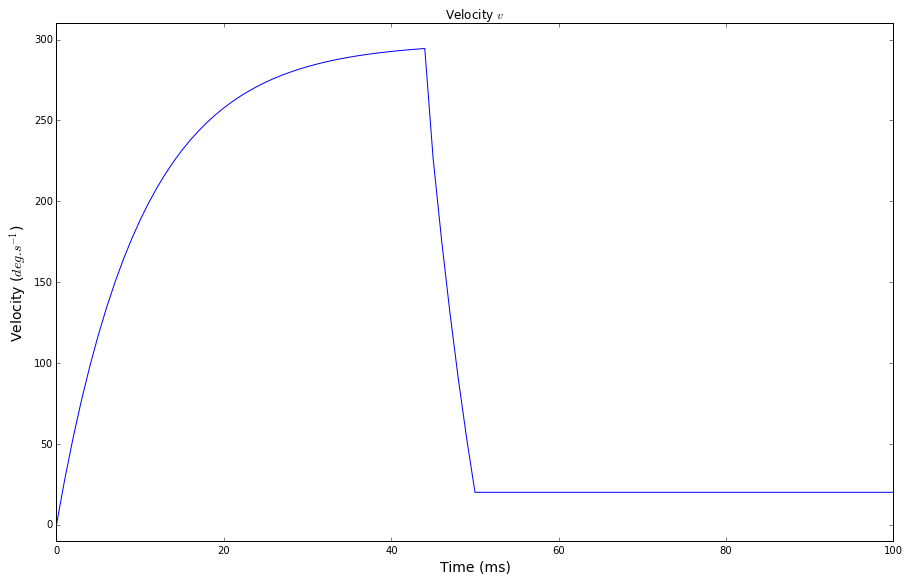

In [25]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v_pursuit, '-')
ax.set_title(r'Velocity $v$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-10, 310)
